In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [4]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [5]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [6]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

In [7]:
def draw_gif(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    for i in tri_line_segments:
        print(i[0],i[1])
        vis.add_line_segment([i[0], i[1]], color='red')
    return vis

In [8]:
%matplotlib tk

drawn_polygon=[]
active=True

def draw_point(point):
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red")
    ax.figure.canvas.draw()

def onclick(event):
    global drawn_polygon, active

    if event.dblclick and active:
        # Mouse1 - dodawanie punktów
        if event.button == 1:
            drawn_polygon.append((event.xdata, event.ydata))
            draw_point(drawn_polygon[-1])
            if len(drawn_polygon) == 1: return
            draw_line([drawn_polygon[-1], drawn_polygon[-2]])
        # Mouse2 - domknij wielokąt i wyjdź
        if event.button == 3:
            active = False
            draw_line([drawn_polygon[-1], drawn_polygon[0]])
            plt.pause(1)
            plt.close()

fig, ax = plt.subplots()
# wygląd UI
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.aspect=1
plt.tight_layout()
# wejście w tryb interaktywny
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.ion()
plt.show()

In [9]:
%matplotlib inline
if len(drawn_polygon)<3:
    print("Wielokąt musi mieć więcej niż 2 punkty.")
else:
    draw_polygon(drawn_polygon)
    print(drawn_polygon)

Wielokąt musi mieć więcej niż 2 punkty.


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

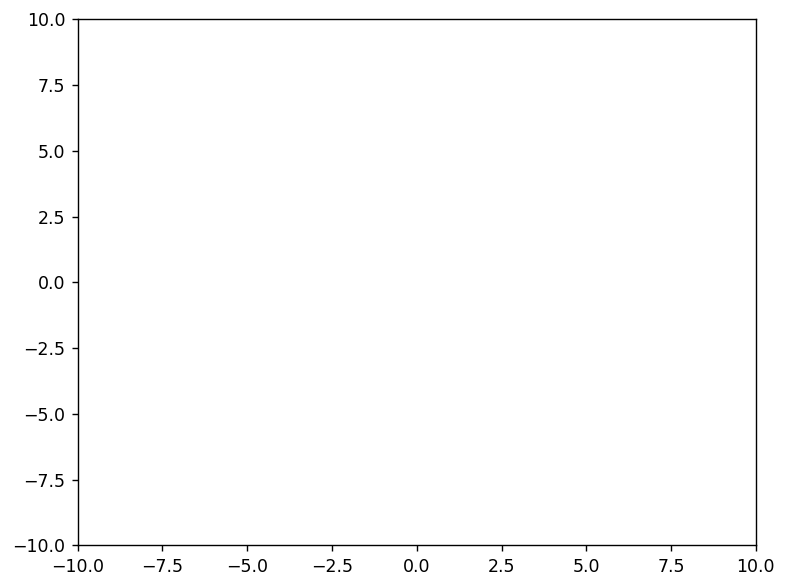

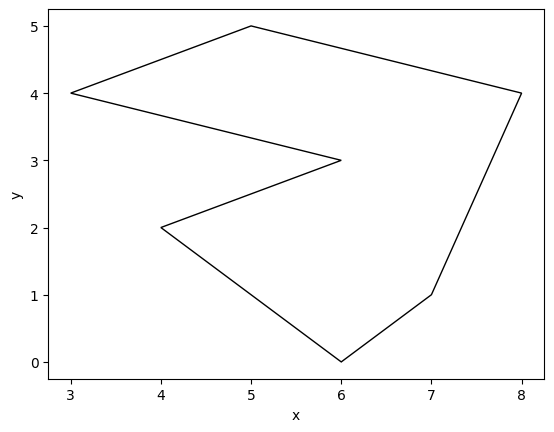

In [10]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [11]:
polygon = [(1,0),(2,1),(1,2),(5,5),(4,2),(-1,1),(10,-3)]# your polygon

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [12]:
def only_smaller(polygon,j):
    i = j
    while i < len(polygon)-1:
        x1,y1 = polygon[i]
        x2, y2 = polygon[i+1]
        if y1<y2:
            break
        i+=1
    return i

def only_bigger(polygon,j):
    i = j
    while i < len(polygon)-1:
        x1,y1 = polygon[i]
        x2, y2 = polygon[i+1]
        if y1>y2:
            break
        i+=1
    return i

In [13]:
def is_y_monotonic(polygon):
    print(polygon)
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    """    polygon.sort(key = lambda x: x[1])
    for i in range(len(polygon)):
        if polygon[i][1] == polygon[i-1][1]:
            return False
    return True"""


    x = only_smaller(polygon,1)
    if only_bigger(polygon,x)==len(polygon)-1:
        return True
    x = only_bigger(polygon,1)
    if only_smaller(polygon,x)==len(polygon)-1:
        return True
    return  False

Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: [(0.020935482517365475, -0.041766749737309476), (0.028697579291559028, -0.01750204385495653), (0.015391127678655803, -0.006380720325544764), (0.029806450259300968, 0.013839867909749365), (0.016721772839946122, 0.0381045737921023), (-0.03073790457940872, 0.0404636424195533), (-0.02275403361166678, 0.017209965948965053), (-0.034064517482634525, -0.011772877188289857), (-0.020758065869731293, -0.016154004639270247), (-0.026745969095537746, -0.044125818364760455)]
Passed
	Test 2: [(-0.035395162643924845, -0.040834352175394696), (-0.022532259418118393, -0.008481410998924091), (-0.017431452966505487, -0.034768175704806455), (-0.008116936837473235, -0.011177489430296644), (-0.0019072594181183955, -0.0364532247244143), (0.004967740581881611, -0.009829450214610375), (0.018052418001236442, -0.03679023452833587), (0.025149192194784842, -0.01656964629304175), (0.028254030904462255, 0.02656760860891906), (0.013173385743171936, 0.04914726547166415), (0.002528224452849351, 0.0

Sprawdź monotoniczność swojego wielokątu.

In [15]:
print(is_y_monotonic(polygon))

[(1, 0), (2, 1), (1, 2), (5, 5), (4, 2), (-1, 1), (10, -3)]
True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

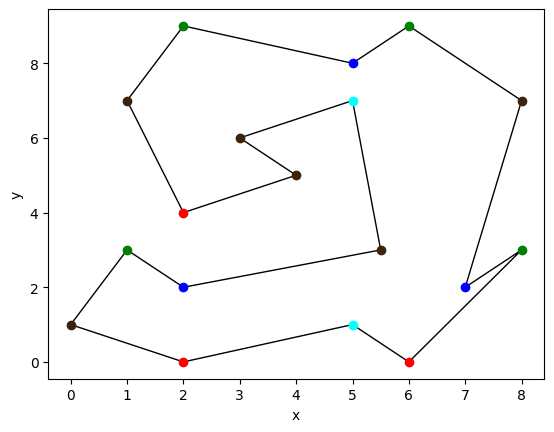

In [16]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
def det(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    det = (bx - ax)*(cy - ay) - (by - ay)*(cx - ax)
    return det

In [18]:
def analyze(prev,curr,next):
    deter =det(prev,curr,next)
    if prev[1]< curr[1] and next[1]< curr[1]:
        if deter>0:
            return 0
        else:
            return 3
    if prev[1]> curr[1] and next[1]> curr[1]:
        if deter<0:
            return 2
        else:
            return 1
    return 4




In [19]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    res =[]
    i = 0
    while i<len(polygon)-1:

        res.append(analyze(polygon[i-1],polygon[i],polygon[i+1]))
        i+=1
    res.append(analyze(polygon[i-1],polygon[i],polygon[0]))
    return res

Przeprowadź test poprawności powyższej funkcji. 

In [20]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

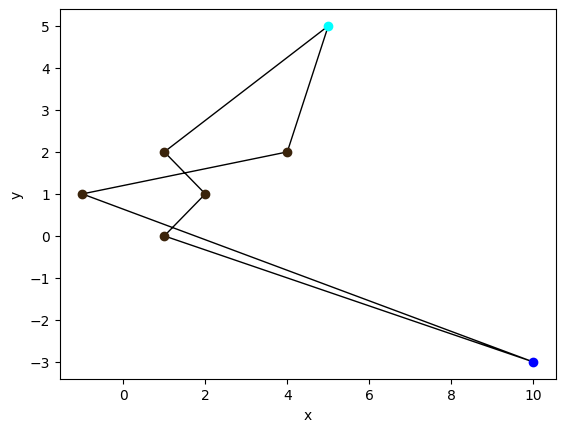

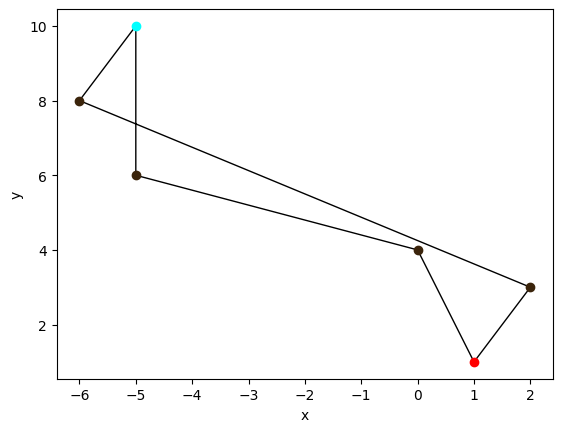

In [21]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

sample_polygon = [(-6,8),(-5,10),(-5,6),(0,4),(1,1),(2,3)]
colors2 = color_vertex(sample_polygon)
draw_polygon_colors(sample_polygon,colors2)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

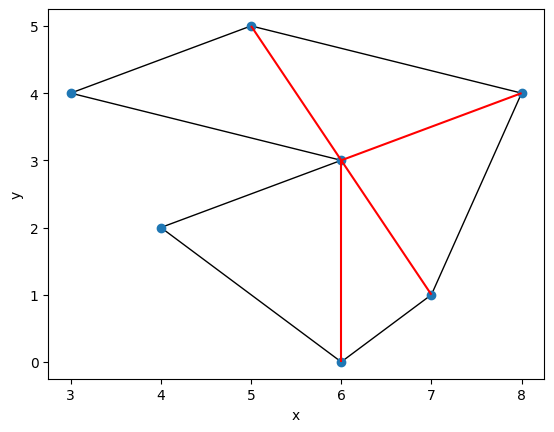

In [22]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [23]:

def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    classifier = {}
    mini = min(polygon, key = lambda x: x[1])
    maxi = max(polygon, key = lambda x: x[1])
    mini_ind = polygon.index(mini)
    maxi_ind = polygon.index(maxi)
    classifier[mini] = 3
    classifier[maxi] = 3
    if mini_ind < maxi_ind:
        for i in range(mini_ind+1, maxi_ind):
            classifier[polygon[i]] = 1
        for i in range(0,len(polygon)):
            if polygon[i] not in classifier.keys():
                classifier[polygon[i]] = 2

    else:
        for i in range(maxi_ind+1, mini_ind):
            classifier[polygon[i]] = 2
        for i in range(0,len(polygon)):
            if polygon[i] not in classifier.keys():
                classifier[polygon[i]] = 1
    results = []
    results_triangles = []
    stack = []
    index_map = {}
    for i in range(len(polygon)):
        index_map[polygon[i]] = i

    def next_to_each_other(item1, item2):
        nonlocal index_map
        diff = abs(index_map[item1] - index_map[item2])
        return diff == 1 or diff == len(index_map)-1

    sorted_polygon = sorted(polygon,key = lambda x: x[1], reverse=True)
    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])
    for i in range(2,len(sorted_polygon)):
        if classifier[sorted_polygon[i]] != classifier[stack[-1]] and classifier[sorted_polygon[i]]!= 3 and classifier[stack[-1]]!= 3:
            last = stack[-1]
            while len(stack) > 0:
                if not next_to_each_other(stack[-1],sorted_polygon[i]):
                    results.append([polygon.index(stack[-1]),polygon.index(sorted_polygon[i])])
                    results_triangles.append((polygon.index(stack[-2]),polygon.index(stack[-1]),polygon.index(sorted_polygon[i])))
                stack.pop()
            stack.append(last)
            stack.append(sorted_polygon[i])
        else:
            while len(stack) > 1:
                pre_last = stack[-2]
                last = stack[-1]
                curr = sorted_polygon[i]
                deter = det(pre_last, last, curr)
                if classifier[curr] == 1:
                    if deter > 0:
                        break
                    else:
                        if not next_to_each_other(pre_last,sorted_polygon[i]):
                            results.append([polygon.index(pre_last),polygon.index(sorted_polygon[i])])
                            results_triangles.append((polygon.index(pre_last),polygon.index(last),polygon.index(sorted_polygon[i])))
                elif classifier[curr] == 2:
                    if deter > 0:
                        if not next_to_each_other(pre_last,sorted_polygon[i]):
                            results.append([polygon.index(pre_last),polygon.index(sorted_polygon[i])])
                            results_triangles.append((polygon.index(pre_last),polygon.index(last),polygon.index(sorted_polygon[i])))
                    else:
                        break
                else:
                    if classifier[last]==1:
                        if deter > 0:
                            break
                        else:
                            if not next_to_each_other(pre_last,sorted_polygon[i]):
                                results.append([polygon.index(pre_last),polygon.index(sorted_polygon[i])])
                                results_triangles.append((polygon.index(pre_last),polygon.index(last),polygon.index(sorted_polygon[i])))
                    elif classifier[last]==2:
                        if deter > 0:
                            if not next_to_each_other(pre_last,sorted_polygon[i]):
                                results.append([polygon.index(pre_last),polygon.index(sorted_polygon[i])])
                                results_triangles.append((polygon.index(pre_last),polygon.index(last),polygon.index(sorted_polygon[i])))
                        else:
                            break
                    else:
                        break # ostatni z pierwszym nigdy
                stack.pop()
            stack.append(sorted_polygon[i])
    return results,results_triangles

In [24]:
def classify_vertices(polygon):
    classifier = {}
    mini = min(polygon, key=lambda x: x[1])
    maxi = max(polygon, key=lambda x: x[1])
    mini_ind = polygon.index(mini)
    maxi_ind = polygon.index(maxi)

    classifier[mini] = 3
    classifier[maxi] = 3

    if mini_ind < maxi_ind:
        for i in range(mini_ind + 1, maxi_ind):
            classifier[polygon[i]] = 1  # Prawy łańcuch
        for p in polygon:
            if p not in classifier:
                classifier[p] = 2       # Lewy łańcuch
    else:
        for i in range(maxi_ind + 1, mini_ind):
            classifier[polygon[i]] = 2  # Lewy łańcuch
        for p in polygon:
            if p not in classifier:
                classifier[p] = 1       # Prawy łańcuch
    return classifier

def is_convex_corner(p1, p2, p3, chain_type):

    deter = det(p1, p2, p3)
    if chain_type == 1:
        return deter < 0
    elif chain_type == 2:
        return deter > 0
    return False # Dla typu 3 (skrajne) logika jest obsługiwana w pętli głównej

def draw_scene(vis, polygon, stack, current_vertex=None, diagonals=[]):

    vis.add_polygon(polygon, fill=False, color='black')
    vis.add_point(polygon, color='blue')
    if stack:
        vis.add_point(stack, color='red')
    if current_vertex:
        vis.add_point([current_vertex], color='green')
    for p_start, p_end in diagonals:
        vis.add_line_segment([polygon[p_start], polygon[p_end]], color='red')

def triangulation_draw(polygon):
    vis = Visualizer()
    classifier = classify_vertices(polygon)
    sorted_polygon = sorted(polygon, key=lambda x: x[1], reverse=True)

    results = []
    stack = [sorted_polygon[0], sorted_polygon[1]]
    idx_map = {pt: i for i, pt in enumerate(polygon)}
    n = len(polygon)

    def next_to_each_other(p1, p2):
        d = abs(idx_map[p1] - idx_map[p2])
        return d == 1 or d == n - 1

    draw_scene(vis, polygon, stack)

    for i in range(2, len(sorted_polygon)):
        curr = sorted_polygon[i]
        is_bottom = (i == len(sorted_polygon) - 1)
        draw_scene(vis, polygon, stack, current_vertex=curr, diagonals=results)
        if (classifier[curr] != classifier[stack[-1]]) or is_bottom:
            last = stack[-1]
            while len(stack) > 0:
                top = stack[-1]
                if not next_to_each_other(top, curr):
                    results.append((idx_map[top], idx_map[curr]))
                stack.pop()
                draw_scene(vis, polygon, stack, current_vertex=curr, diagonals=results)
            if not is_bottom:
                stack.append(last)
                stack.append(curr)
        else:
            while len(stack) > 1:
                pre_last = stack[-2]
                last = stack[-1]
                chain = classifier[curr]
                if is_convex_corner(pre_last, last, curr, chain):
                    if not next_to_each_other(pre_last, curr):
                        results.append((idx_map[pre_last], idx_map[curr]))

                    stack.pop()
                    draw_scene(vis, polygon, stack, current_vertex=curr, diagonals=results)
                else:
                    break

            stack.append(curr)

        draw_scene(vis, polygon, stack, diagonals=results)

    return results, vis

In [25]:
sample_polygon = [(-6,8),(-5,10),(-5,6),(0,4),(1,1),(2,3)]

colors3 = color_vertex(sample_polygon)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [26]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: WRONG ANSWER
		Output:   ([[4, 0], [3, 0], [2, 0]], [(4, 5, 0), (3, 4, 0), (2, 3, 0)])
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: WRONG ANSWER
		Output:   ([[1, 7], [7, 2], [2, 6], [6, 3], [3, 5]], [(0, 1, 7), (1, 7, 2), (7, 2, 6), (2, 6, 3), (6, 3, 5)])
		Expected: [[1, 7], [2, 7], [2, 6], [3, 6], [3, 5]]
	Test 3: WRONG ANSWER
		Output:   ([[17, 1], [1, 16], [16, 2], [2, 15], [15, 3], [3, 14], [14, 4], [4, 13], [13, 5], [5, 12], [12, 6], [6, 11], [11, 7], [11, 8], [8, 10]], [(0, 17, 1), (17, 1, 16), (1, 16, 2), (16, 2, 15), (2, 15, 3), (15, 3, 14), (3, 14, 4), (14, 4, 13), (4, 13, 5), (13, 5, 12), (5, 12, 6), (12, 6, 11), (6, 11, 7), (11, 7, 8), (11, 8, 10)])
		Expected: [[1, 17], [16, 1], [16, 2], [2, 15], [3, 15], [3, 14], [4, 14], [13, 4], [5, 13], [12, 5], [6, 12], [11, 6], [7, 11], [8, 11], [10, 8]]
	Test 4: WRONG ANSWER
		Output:   ([[5, 3], [3, 6], [6, 2], [6, 1], [1, 7], [7, 0], [0, 8]], [(5, 4, 3), (5, 3, 6), (3, 6, 2), (6, 2, 1), (6, 1, 7), (1, 7, 

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [27]:
import json


def zapisz_do_pliku(nazwa_pliku, wielokat, triangulacja):
    """
    Zapisuje dane do pliku JSON.
    :param wielokat: lista krotek punktów [(x,y), ...]
    :param triangulacja: lista krotek indeksów [(i1, i2, i3), ...]
    """
    dane = {
        "wielokat": wielokat,
        "triangulacja": triangulacja
    }

    try:
        with open(nazwa_pliku, 'w') as plik:
            # indent=4 sprawia, że plik ładnie wygląda w notatniku
            json.dump(dane, plik, indent=4)
        print(f"Sukces: Zapisano dane do '{nazwa_pliku}'.")
    except IOError as e:
        print(f"Błąd zapisu: {e}")


def wczytaj_z_pliku(nazwa_pliku):
    """
    Odczytuje dane z pliku JSON.
    :return: krotka (wielokat, triangulacja) jako listy krotek
    """
    try:
        with open(nazwa_pliku, 'r') as plik:
            dane = json.load(plik)

        # JSON zapisuje krotki jako listy, więc zamieniamy je z powrotem na krotki (tuple)
        # dla zachowania spójności z Twoim kodem
        wielokat = [tuple(pkt) for pkt in dane["wielokat"]]
        triangulacja = [tuple(tr) for tr in dane["triangulacja"]]

        print(f"Sukces: Wczytano dane z '{nazwa_pliku}'.")
        return wielokat, triangulacja

    except (IOError, json.JSONDecodeError) as e:
        print(f"Błąd odczytu: {e}")
        return [], []

In [28]:
def wczytaj_z_pliku(nazwa_pliku):
    """
    Odczytuje dane z pliku JSON.
    :return: krotka (wielokat, triangulacja) jako listy krotek
    """
    try:
        with open(nazwa_pliku, 'r') as plik:
            dane = json.load(plik)

        # JSON zapisuje krotki jako listy, więc zamieniamy je z powrotem na krotki (tuple)
        # dla zachowania spójności z Twoim kodem
        wielokat = [tuple(pkt) for pkt in dane["wielokat"]]
        triangulacja = [tuple(tr) for tr in dane["triangulacja"]]

        print(f"Sukces: Wczytano dane z '{nazwa_pliku}'.")
        return wielokat, triangulacja

    except (IOError, json.JSONDecodeError) as e:
        print(f"Błąd odczytu: {e}")
        return [], []

In [29]:
polygons = []

In [39]:
%matplotlib tk

drawn_polygon=[]
active=True

def draw_point(point):
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red")
    ax.figure.canvas.draw()

def onclick(event):
    global drawn_polygon, active

    if event.dblclick and active:
        # Mouse1 - dodawanie punktów
        if event.button == 1:
            drawn_polygon.append((event.xdata, event.ydata))
            draw_point(drawn_polygon[-1])
            if len(drawn_polygon) == 1: return
            draw_line([drawn_polygon[-1], drawn_polygon[-2]])
        # Mouse2 - domknij wielokąt i wyjdź
        if event.button == 3:
            active = False
            draw_line([drawn_polygon[-1], drawn_polygon[0]])
            plt.pause(1)
            plt.close()

fig, ax = plt.subplots()
# wygląd UI
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.aspect=1
plt.tight_layout()
# wejście w tryb interaktywny
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.ion()
plt.show()

In [31]:
polygons.append(drawn_polygon)




In [32]:
print(polygons)
print(len(polygons))

[[]]
1


Sukces: Zapisano dane do 'polygonx'.


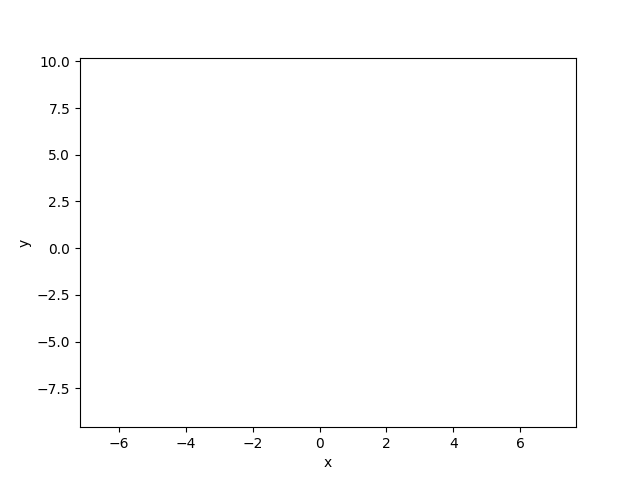

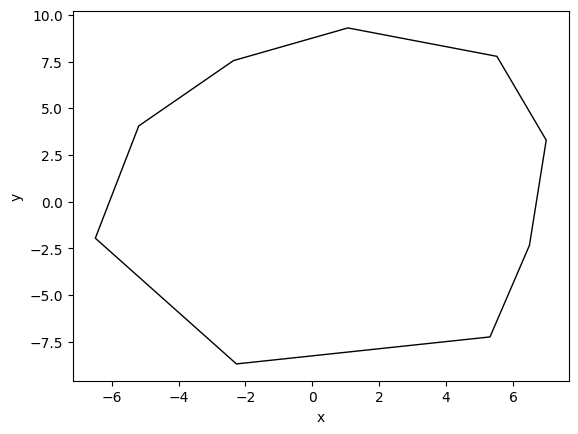

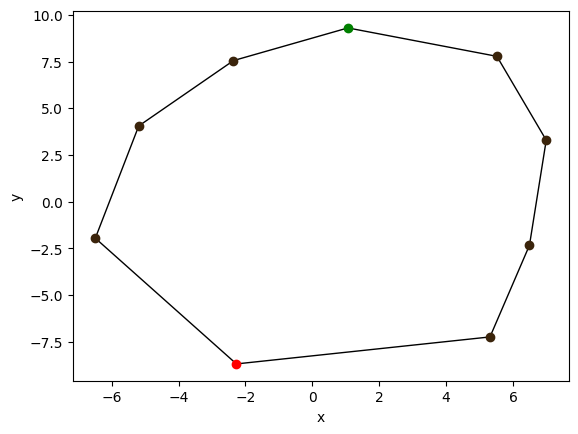

In [36]:
%matplotlib inline

sample_polygon = drawn_polygon
sample_colors = color_vertex(sample_polygon)
draw_polygon(sample_polygon)
draw_polygon_colors(sample_polygon,sample_colors)

tri1, tri_triangles1 = triangulation(sample_polygon)
draw_polygon_tri(sample_polygon, [(sample_polygon[x], sample_polygon[y]) for (x, y) in tri1])
zapisz_do_pliku("polygonx",sample_polygon,tri1)
tri, visi = triangulation_draw(sample_polygon)
#visi.save_gif("gifx.gif",300)
visi.show_gif(interval=400)



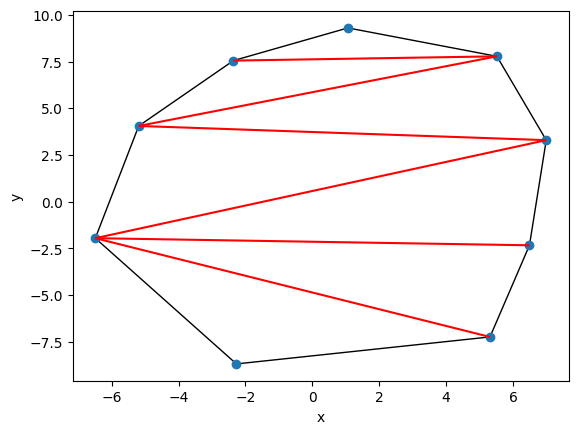

In [37]:
draw_polygon_tri(sample_polygon,[(sample_polygon[x],sample_polygon[y]) for (x, y) in tri1])

In [99]:
for i in range(len(polygons)-1):
    sample_polygon = polygons[i]
    tri, visi = triangulation_draw(sample_polygon)
    visi.save_gif("gif1x.gif",300)
    visi.show_gif(interval=400)


[[7, 0], [7, 1], [1, 6], [6, 2], [2, 5], [2, 4]]
[(8, 7, 0), (7, 0, 1), (7, 1, 6), (1, 6, 2), (6, 2, 5), (2, 5, 4)]


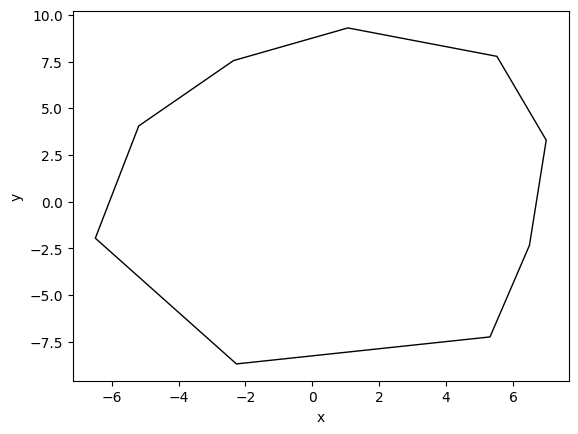

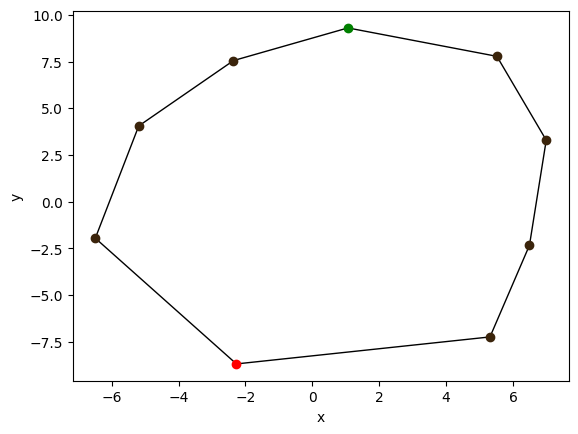

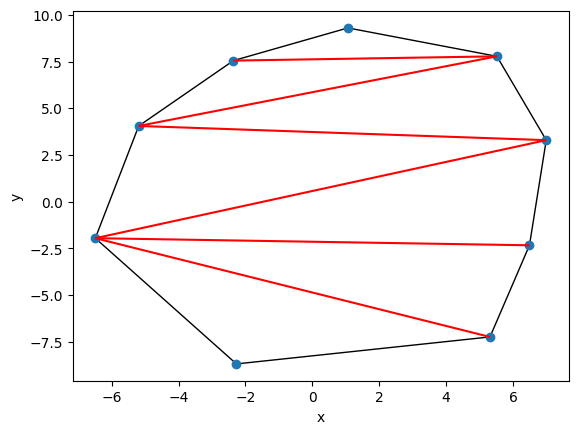

In [38]:
%matplotlib inline

sample_polygon = drawn_polygon
sample_colors = color_vertex(sample_polygon)
draw_polygon(sample_polygon)
draw_polygon_colors(sample_polygon,sample_colors)
tri1, tri_triangles1 = triangulation(sample_polygon)


draw_polygon_tri(sample_polygon, [(sample_polygon[x], sample_polygon[y]) for (x, y) in tri1])
print(tri1)
print(tri_triangles1) # indeksy



In [35]:
zapisz_do_pliku("polygon1",sample_polygon,tri1)


Sukces: Zapisano dane do 'polygon1'.


Sukces: Wczytano dane z 'polygon1'.
[(-4.658235625416006, 7.8848692896751995), (-6.57518816240848, 2.7515183522577207), (-5.837898725103683, -2.7620808027462385), (0.4290614919870954, -7.325059413783999), (4.70534022835492, -8.085555848956957), (7.212124315191232, -4.710852917876949), (1.5349956479442906, -2.0491153947715883), (8.576109774205104, 0.32743596514391093), (-2.8887409758844935, 3.2743596514391307), (5.000256003276839, 3.987325059413781), (-2.188316010444936, 9.40586216002112)]
[(0, 9), (0, 8), (8, 1), (1, 7), (1, 6), (6, 2), (2, 5), (5, 3)]


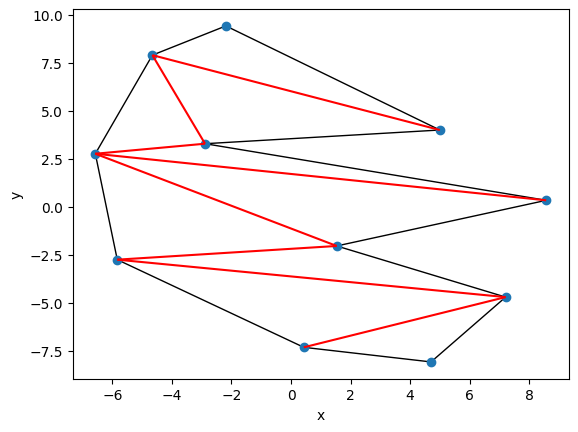

In [36]:
sample_polygon, tri = wczytaj_z_pliku("polygon1")
print(sample_polygon)
print(tri)
draw_polygon_tri(sample_polygon, [(sample_polygon[x], sample_polygon[y]) for (x, y) in tri])


!


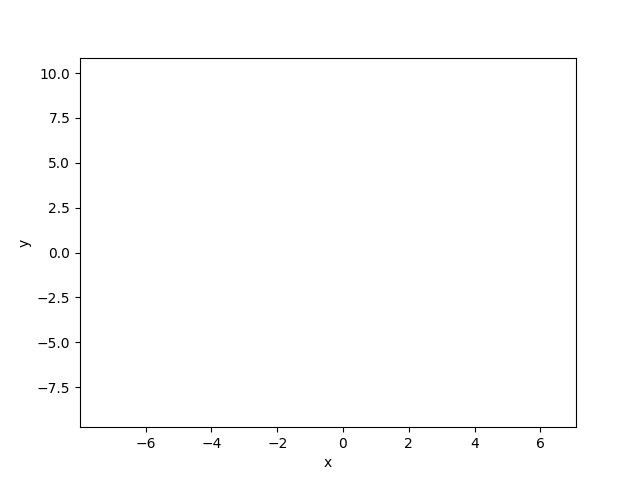

In [59]:
tri, visi = triangulation_draw(sample_polygon)
print("!")



visi.show_gif(interval = 500)

In [39]:
vis = Visualizer()
vis.add_polygon(sample_polygon, fill = False)
vis.add_line_segment([(sample_polygon[x], sample_polygon[y]) for (x, y) in tri])
vis.save("polygon1.jpg")
gif = draw_gif(sample_polygon,[(sample_polygon[x], sample_polygon[y]) for (x, y) in tri])
gif.show_gif(interval=400)
gif.save_gif(filename="gif1.gif")

(-4.658235625416006, 7.8848692896751995) (5.000256003276839, 3.987325059413781)
(-4.658235625416006, 7.8848692896751995) (-2.8887409758844935, 3.2743596514391307)
(-2.8887409758844935, 3.2743596514391307) (-6.57518816240848, 2.7515183522577207)
(-6.57518816240848, 2.7515183522577207) (8.576109774205104, 0.32743596514391093)
(-6.57518816240848, 2.7515183522577207) (1.5349956479442906, -2.0491153947715883)
(1.5349956479442906, -2.0491153947715883) (-5.837898725103683, -2.7620808027462385)
(-5.837898725103683, -2.7620808027462385) (7.212124315191232, -4.710852917876949)
(7.212124315191232, -4.710852917876949) (0.4290614919870954, -7.325059413783999)


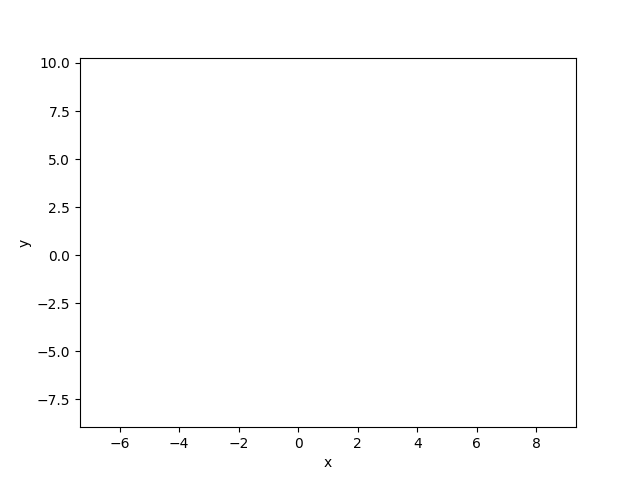

In [40]:
gif.show_gif(interval=400)
